## ML ALGORITHMS - Classification (Supervised L. Part 1)

### importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

### importing data

In [ ]:
data= pd.read_csv('../input/sonaralldata/sonar.all-data.csv', header=None) 
data.head()

In [ ]:
#missing value checking
data.isnull().sum().sum()

In [ ]:
data.describe()

In [ ]:
#target value
data.iloc[:,-1].unique()

In [ ]:
#Turning ROCK and MINE into 0 and 1 (binary)
data= data.replace(to_replace="R", value=0, regex=True)
data= data.replace(to_replace="M", value=1, regex=True)
data.head()

In [ ]:
#train-test data
X= data.iloc[:,:-1]
y= data.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
#visualizing for 2 Principal Components representing features

from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)
plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=1, label='Rock', s=4)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=1, label='Mine', s=4)
plt.legend()
plt.title('Sonar Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

## Diving into Classification Algorithms

## KNN

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure. In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 

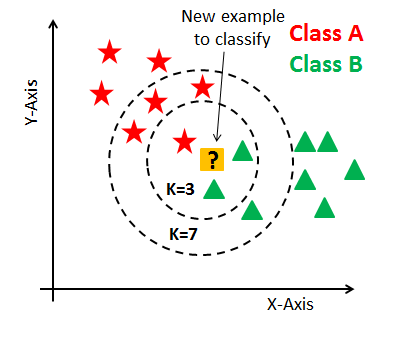

**Why you should use KNN?**

1- It is very simple to understand and implement. <br>
2- KNN is a non-parametric algorithm that don't make strong assumptions. By not making assumptions, they are free to learn any functional form from the training data. <br>
3- It’s an instance-based learning; k-NN is a memory-based approach. The classifier immediately adapts as we collect new training data. It allows the algorithm to respond quickly to changes in the input during real-time use. <br>
4- Easy to implement for multi-class problem whereas K-NN adjust to it without any extra efforts. <br>
5- KNN algorithm gives user the flexibility to choose distance.(Euclidean Distance, Hamming Distance, Manhattan Distance, Minkowski Distance) <br>
6- It can learn nonlinear decision boundaries. (If a problem is nonlinear and its class boundaries cannot be approximated well with linear hyperplanes, then nonlinear classifiers are often more accurate than linear classifiers.)

**Why you should not use KNN?**

1- As dataset grows efficiency or speed of algorithm declines very fast. <br>
2- Choosing the optimal number of neighbors can be an issue. <br>
3- KNN doesn’t perform well on imbalanced data. <br>
4- Very sensitive to outliers as it simply chose the neighbors based on distance criteria. <br>
5- Necessary that features have the same scale, since absolute differences in features weight the same.

In [ ]:
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('test score: {:.4f}'.format(knn.score(X_test, y_test)))

In [ ]:
#scaling the data for better accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn.fit(X_train_scaled, y_train)
print('train score: {:.4f}'.format(knn.score(X_train_scaled, y_train)))
print('test score: {:.4f}'.format(knn.score(X_test_scaled, y_test)))

In [ ]:
knn_prediction = knn.predict(X_test_scaled)
cm= confusion_matrix(y_test, knn_prediction)
print(cm)

When K = 1, the prediction is sensitive to noise, outliers, mislabeled data, and other sources of variation in individual data points.For larger values of K, the areas assigned to different classes are smoother and not as fragmented and more robust to noise in the individual points. But possibly with some mistakes, more mistakes in individual points. This is an example of what's known as the bias variance tradeoff.

In [ ]:
#trying k values for best score
scores=[]
k_range = range(1,20)
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [ ]:
scores

In [ ]:
print("max score for k=", scores.index(max(scores)) +1,"\n","max score=", max(scores))

In [ ]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,50):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy')

## LOGISTIC REGRESSION

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.
A binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function.

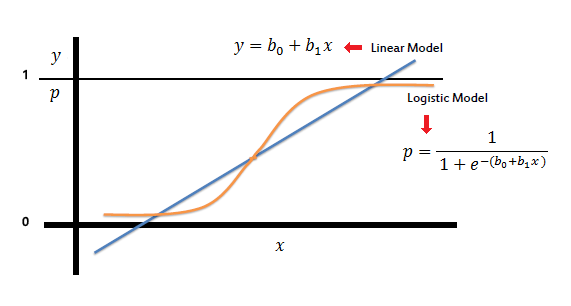

**Why you should use LR?**

1- It is easier to implement, interpret and very efficient to train. <br>
2- Logistic Regression performs well when the dataset is linearly separable. <br>
3- Multi-collinearity is not really an issue and can be countered with L2 regularization to an extent.<br>
4- Logistic regression is less prone to over-fitting but it can overfit in high dimensional datasets. You should consider Regularization (L1 and L2) techniques to avoid over-fitting in these scenarios.<br>
5- No hyperparamer tunning needed except for the threshold of class labels which is usually chosen as 0.5.<br>

**Why you should not use LR?**

1- Main limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. In the real world, the data is rarely linearly separable. (Can't learn non linear decision boundaries)<br>
2- If the number of observations are lesser than the number of features, Logistic Regression should not be used, otherwise it may lead to overfit.<br>
3- In LR, features need to be scaled and normalized.<br>
4- LR is sensitive to the unusual observations: outliers, high leverage, and influential observations. <br>
5- Appropriate features must be selected before fitting the model or as an alternative the Logistic Rgression model should be regularized with lasso to select the features.<br>

In [ ]:
log= LogisticRegression().fit(X_train_scaled, y_train)
print('logreg train score: {:.3f}'.format(log.score(X_train_scaled, y_train)))
print('logreg test score: {:.3f}'.format(log.score(X_test_scaled, y_test)))

In [ ]:
lr_prediction = log.predict(X_test_scaled)
cm= confusion_matrix(y_test, lr_prediction)
print(cm)

In [ ]:
#an alternative to visualize confusion matrix
cm = confusion_matrix(y_test, log.predict(X_test_scaled))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Rock', 'Predicted Mine'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Rock', 'Actual Mine'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=14)
plt.show()

## NAIVE BAYES

NB Classifier is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. It is used for many NLP models.<br>

*Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c):*<br>
P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).<br>
P(c) is the prior probability of class.<br>
P(x|c) is the likelihood which is the probability of predictor given class.<br>
P(x) is the prior probability of predictor.<br>

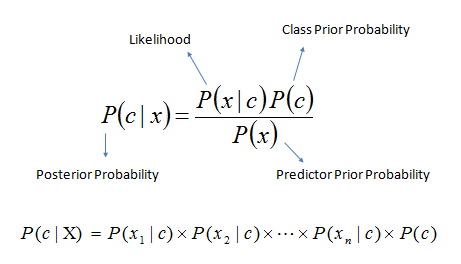

**Why you should use NB?** <br>

1- It is easy and fast to predict class of test data set. It also perform well in multi class prediction.<br>
2- When assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data.<br>
3- It perform well in case of categorical input variables compared to numerical variable(s). For numerical variable, normal distribution is assumed (bell curve, which is a strong assumption).<br>

**Why you should not use NB?** <br>

1- Assumption of independent predictors, in real life is almost impossible that we get a set of predictors which are completely independent.<br>
2- If the categorical variable has a category in the test data but not in the train data, the probability of this cat will be assigned zero and prediction is not possible.<br>

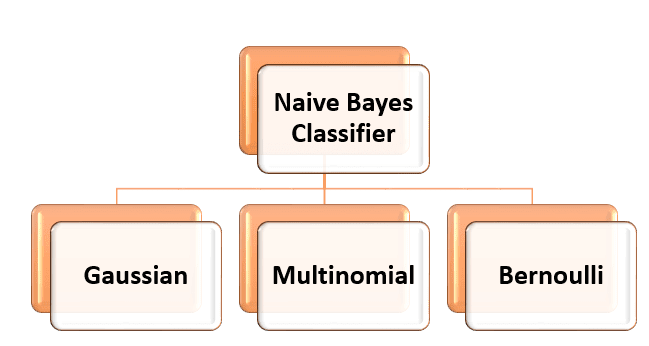

There are three types of Naive Bayes model under the scikit-learn library:<br>
Gaussian: GNBs, continuous values associated with each feature are assumed to be distributed according to a Gaussian (normal) distribution.<br>
Multinomial: It is used for discrete counts(ex. text classification problem).<br>
Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones).<br>

We use Gaussian NB for this dataset, because values are continous.

In [ ]:
nb= GaussianNB().fit(X_train_scaled, y_train)
print('clf train score: {:.2f}'.format(nb.score(X_train_scaled, y_train)))
print('clf test score: {:.2f}'.format(nb.score(X_test_scaled, y_test)))

In [ ]:
nb_prediction= nb.predict(X_test_scaled)
cm= confusion_matrix(y_test, nb_prediction)
print(cm)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)
vifs=calc_vif(data)
vifs["VIF"].sort_values(ascending=False)

VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others. So NB assumption is not met. (need to fix this)

## SUPPORT VECTOR MACHINE

Support Vector Machine(SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. It is mostly used in classification problems called SVC. It is good for image analysis tasks, such as image classification and handwritten digit recognition, also text mining tasks.<br>
SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well.

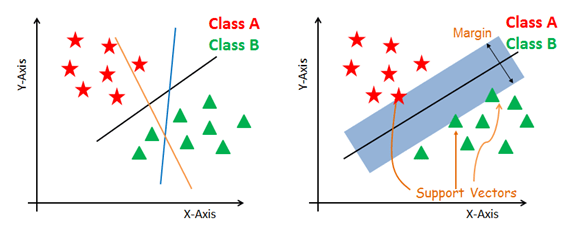

SVM uses a *kernel trick* to transform the input space to a higher dimensional space as shown on the right. The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2=y^2). Now you can easily segregate these points using linear separation.

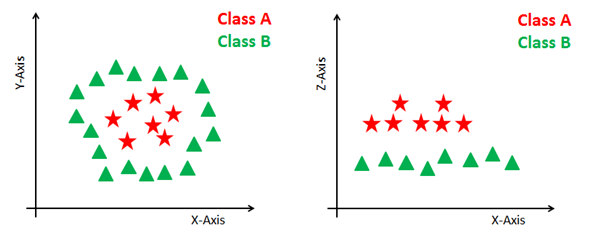

**Why you should use SVM?** <br>

1- SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm.<br>
2- They also use less memory because they use a subset of training points in the decision phase. <br>
3- SVM works well with a clear margin of separation and with high dimensional space.<br>

**Why you should not use SVM?** <br>

1- SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. <br>
2- It works poorly with overlapping classes and is also sensitive to the type of kernel used.<br>
3- The algorithm is prone for over-fitting, if the number of features is much greater than the number of samples.<br>
4- SVMs do not directly provide probability estimates, which are desirable in most classification problems.

In [ ]:
svm= SVC().fit(X_train_scaled, y_train) 
print('svm train score: {:.2f}'.format(svm.score(X_train_scaled, y_train)))
print('svm test score: {}'.format(svm.score(X_test_scaled, y_test)))

In [ ]:
svm_prediction = svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, svm_prediction)
print(cm)

LinearSVC is another (faster) implementation of Support Vector Classification for the case of a linear kernel. But LinearSVC does not accept parameter kernel, as this is assumed to be linear. It also lacks some of the attributes of SVC, like support_.

In [ ]:
svm_2= LinearSVC().fit(X_train_scaled, y_train)
print('svm train score: {}'.format(svm_2.score(X_train_scaled, y_train)))
print('svm test score: {}'.format(svm_2.score(X_test_scaled, y_test)))

## DECISION TREE

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. <br>
Decision Tree Classifier is a class capable of performing multi-class classification on a dataset.

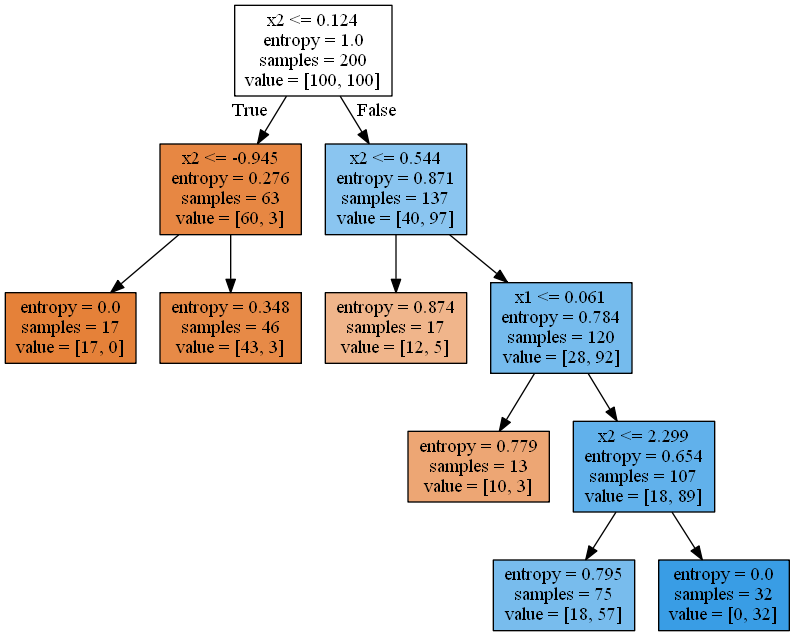

**Why you should use DT?** <br>

1- They are easily visualized and interpreted (visiual outputs, feature selection etc.). <br>
2- No need to do feature pre-processing or normalization.  <br>
3- Works well with data sets that have a mixture of feature types (binary, categorical or continuous and with features that are on very different scales. If you deal with a problem where inputs are categorical/discrete values, it is better to apply tree). <br>
4- Missing values in attributes can be efficiently handled. <br>
5- Linearity between independent and dependent variable is not a constraint for prediction. <br>

**Why you should not use DT?** <br>

1- They can still overfit, may not achieve the best generalization performance compared to other methods. (ensemble algorithms can be useful to overcome this issue)<br>
2- The hierarchical structure of the tree causes results to be very unstable if data is altered slightly (it splits the data based on a single attribute).<br>
3- Information gain for variables with a high number of subclasses gives a biased response for said attributes.<br>

In [ ]:
dt= DecisionTreeClassifier().fit(X_train_scaled, y_train) #maxdepth kac dallanma oldugu
print('clf train score: {:.2f}'.format(dt.score(X_train_scaled, y_train)))
print('clf test score: {:.2f}'.format(dt.score(X_test_scaled, y_test)))

In [ ]:
dt_prediction = dt.predict(X_test_scaled)
cm = confusion_matrix(y_test, dt_prediction)
print(cm)

In [ ]:
names= X_train.columns
sorted(zip(map(lambda x: round(x, 4), dt.feature_importances_), names), reverse=True)[:10]

In [ ]:
Importance = pd.DataFrame({'Importance':dt.feature_importances_*100},
                         index = X_train.columns)

Importance_nonzero = Importance[(Importance.T != 0).any()]
Importance_nonzero.sort_values(by ='Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'b')

plt.xlabel('Variable Importance %')
plt.ylabel("Column Name")
plt.gca().legend_ = None

## RANDOM FOREST

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. A diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers.

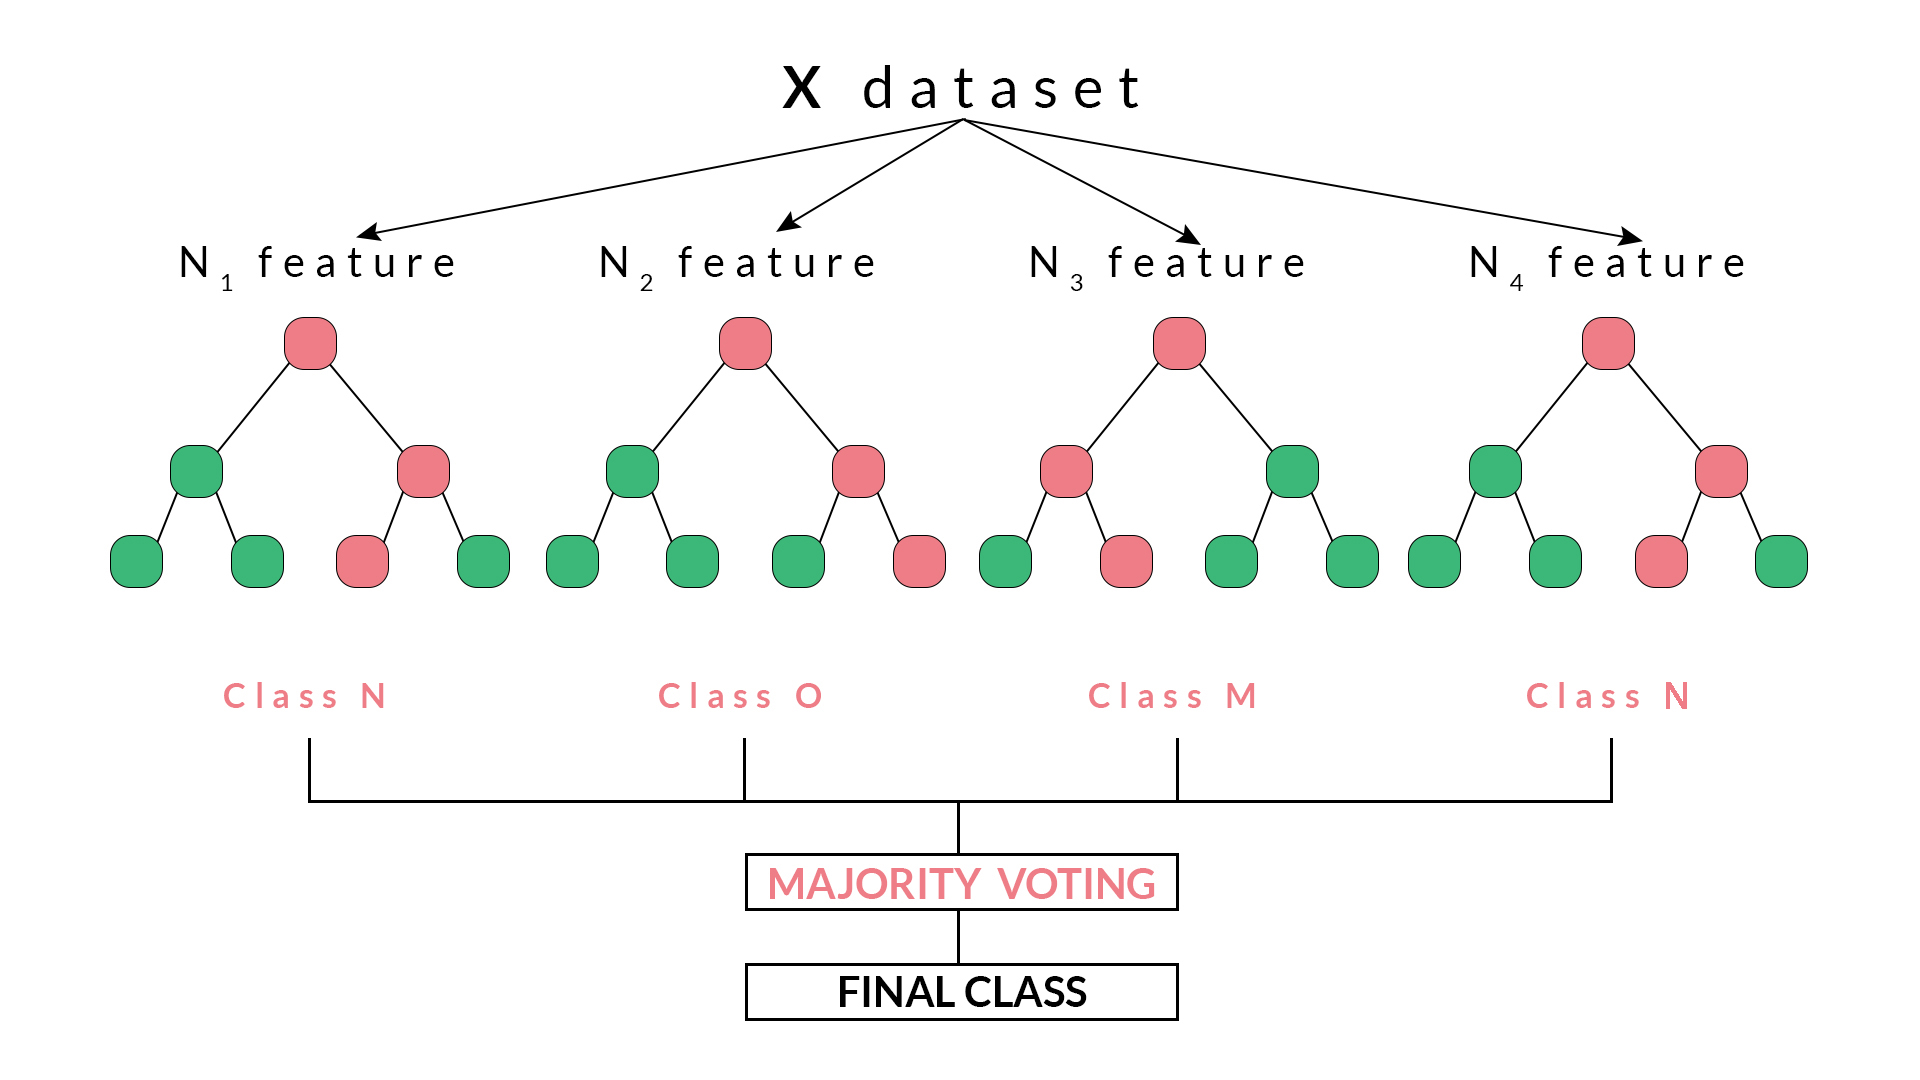

**Why you should use RF?** <br>

1- It can handle large data sets with higher dimensionality. It can handle thousands of input variables and identity most significant variables so it is considered as one of the dimensionality reduction method (feature importances).<br>
2- Like decision trees, it works well with data sets that have a mixture of feature types.<br>
3- It has methods for balancing errors in data sets where classes are imbalanced.<br>
4- It has an effective method for estimating missing data and maintains accuracy when large proportion of the data are missing.<br>

**Why you should not use RF?** <br>

1- Random forest can feel like a black box approach for a statistical modelers, we have very little control on what the model does (can be less interpretable than an individual decision tree).<br>
2- Training a large number of deep trees can have high computational costs and use a lot of memory.<br>

In [ ]:
rf= RandomForestClassifier().fit(X_train_scaled, y_train)
print('clf train score: {:.2f}'.format(rf.score(X_train_scaled, y_train)))
print('clf test score: {:.2f}'.format(rf.score(X_test_scaled, y_test)))

In [ ]:
rf_prediction = rf.predict(X_test_scaled)
cm = confusion_matrix(y_test,rf_prediction)
print(cm)

In [ ]:
sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True)[:10]

In [ ]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100},
                         index = X_train.columns)

#filtering less than %2 importance to highlight the most important ones
Importance_mostly = Importance[(Importance.T >= 2).any()]
Importance_mostly.sort_values(by ='Importance',
                      axis = 0,
                      ascending = True).plot(kind = 'barh',
                                            color = 'g')

plt.xlabel('Variable Importance %')
plt.ylabel("Column Name")
plt.gca().legend_ = None

## NEURAL NETWORK (MLP Classifier)

Artificial neural networks are built of simple elements called neurons, which take in a real value, multiply it by a weight, and run it through a non-linear activation function. By constructing multiple layers of neurons, each of which receives part of the input variables, and then passes on its results to the next layers, the network can learn very complex functions. Theoretically, a neural network is capable of learning the shape of just any function, given enough computational power. <br>
A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.

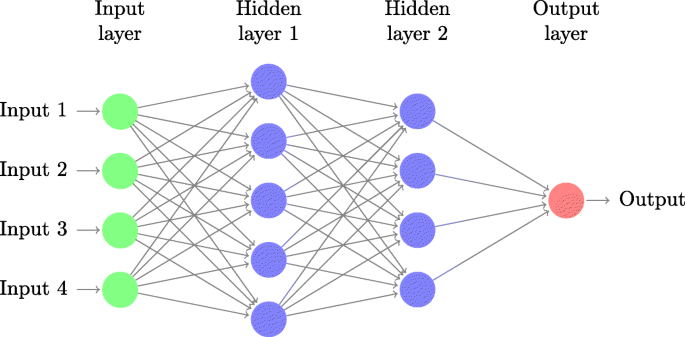

**Why you should use MLP?** <br>

1- Having  a collection of classifiers is that each of those classifiers can engage themselves for finding different patterns in the data and since there are many such units, the network can learn a lot of features from the data. <br>
2- A conventional classifier would use logistic regression (or a decision tree or an SVM) and would try to fit a linear model for classification. ANN is much better suited to generalize and give better predictions on test data. With enough data, generally better results are possible for ANN. <br>
3- Very effective for high dimensionality problems.<br>
4- Powerful tuning options to prevent over- and under-fitting.<br>
5- Deep learning frameworks are readily available that do the work for you.<br>

**Why you should not use MLP?** <br>

1- Theoretically complex, difficult to implement. <br>
2- This larger and more complex models typically require significant volumes of data, computation, and training time to learn. (For small data sets, the lbfgs solver tends to be faster, and find more effective weights.). <br>
3- Careful pre-processing of the input data is needed, to help ensure fast, stable, meaningful solutions to finding the optimal set of weights. <br>
4- When the features are of very different types, MLP is less of a good choice<br>

In [ ]:
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train_scaled, y_train)
print('clf train score: {:.2f}'.format(mlp.score(X_train_scaled, y_train)))
print('clf test score: {:.2f}'.format(mlp.score(X_test_scaled, y_test)))

In [ ]:
mlp_prediction = mlp.predict(X_test_scaled)
cm = confusion_matrix(y_test,mlp_prediction)
print(cm)

## Classifiers All Together

Putting all prediction for test data by all classifiers and making the final prediction by getting mean of all decisions.

In [ ]:
pr_dict = {'KNN' : knn_prediction,'Logistic Regression' : lr_prediction,'SVM' : svm_prediction,
           'Decision Tree' : dt_prediction, 'Random Forest' : rf_prediction,'Naive Bayes' : nb_prediction, 'MLP' : mlp_prediction}

all_predictions = pd.DataFrame(pr_dict)

final_prediction = [] #final prediction list

for i in range(all_predictions.shape[0]):    
    if all_predictions.mean(axis=1)[i] <= 0.5:
        final_prediction.append(0)  #means rock
    else:
        final_prediction.append(1) #means mine
all_predictions["final pred"] = final_prediction
all_predictions["real"] = y_test.values
all_predictions.head()

In [ ]:
cm = confusion_matrix(final_prediction, y_test)
print(cm)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, final_prediction))

In [ ]:
models= [knn,log,svm,dt,rf,nb,mlp]
all_scores = pd.DataFrame(np.zeros((8,2)))
all_scores.columns = ["train score", "test score"]
all_scores.index = ['KNN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest',
       'Naive Bayes', 'MLP', "Final Pred"]
train_scores=[]
test_scores=[]
for model in models:
    model.fit(X_train_scaled,y_train)
    train_scores.append(model.score(X_train_scaled, y_train))
    test_scores.append(model.score(X_test_scaled, y_test))
#for final pred row
train_scores.append("-")
test_scores.append(accuracy_score(y_test, final_prediction))
all_scores["train score"]= train_scores
all_scores["test score"]= test_scores
all_scores

In [ ]:
all_scores["test score"].sort_values(ascending=False)

These algorithms have not optimized parameters, this is just their raw functions. That's why deciding a classifier just by looking at this results are not reliable. Also, Logistic Regression, Decision Tree, Random Forest and MLP has 1.0 training score, so they are overfitting. Even if their test scores are higher, they might not be performed well on a different test set. Also Naive Bayes' assumption is not met in this data.

Without train-test split, we can check the scores by using cross validation:

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers

# Instantiate the machine learning classifiers
knn_model = KNeighborsClassifier()
log_model = LogisticRegression()
svc_model = SVC()
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
mlp_model = MLPClassifier()

# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    knn = cross_validate(knn_model, X, y, cv=folds, scoring=scoring)
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    mlp = cross_validate(mlp_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({ 'KNN': [knn['test_accuracy'].mean(),
                                                knn['test_precision'].mean(),
                                                knn['test_recall'].mean(),
                                                knn['test_f1_score'].mean()],
                                        
                                        'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()],
                                       "MLP": [mlp['test_accuracy'].mean(),
                                                mlp['test_precision'].mean(),
                                                mlp['test_recall'].mean(),
                                                mlp['test_f1_score'].mean()]},
                                       index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
                                      

    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(X, y, 5)

Accuracy = TP+TN/TP+FP+FN+TN <br>
Precision = TP/TP+FP<br>
Recall = TP/TP+FN<br>
F1 Score = 2*(Recall * Precision) / (Recall + Precision)<br>

These different score types can be important by different tasks. It is all about our tolerance level for TP,TN,FP,FN scores.

In [ ]:
#algorithm comparison with boxplots
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('MLP', MLPClassifier()))

results = []
names = []
from sklearn.model_selection import cross_val_score
for name, model in models:
    kfold = 5
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)

In [ ]:
for i in range(len(results)):
    print(names[i],results[i].mean())

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

In the graph, orange lines are median, little circles are outliers (high std).
Random Forest, MLP and Logistic Regression may be tried and tuned parameters after to prevent overfitting.

You can check these useful cheatsheet (https://blogs.sas.com/content/subconsciousmusings/2017/04/12/machine-learning-algorithm-use/).

![](http://blogs.sas.com/content/subconsciousmusings/files/2017/04/machine-learning-cheet-sheet.png)

Final Comments:
Classification is such a fun era to implement.
To choose the best one, we need to consider our data amount, our wanted speed and accuracy, and how much we want to be interpretable.
The best one is the most suitable one for our needs. It is not just about the score.

Our Rocks or Mines dataset has all numeric features and it is not considered to be high dimensional. We can choose Logistic regression if we want more explainable results,because of LR is sensitive to outliers, we may need to do outlier detection and feature selection for better accuracy. Also, we can choose RF, MLP to compute fast, and if we can feed our data with more observations they can perform better. An intense preprocessing may heal our algorithms' performance. Hope these explanations can help to take appropriate actions.

Take care of you & your algorithms :)

**References/Acknowlegments :**<br>

Applied Machine Learning in Python course in Coursera : https://www.coursera.org/learn/python-machine-learning<br>
KNN:https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm <br>
https://www.fromthegenesis.com/pros-and-cons-of-k-nearest-neighbors/<br>
LR:https://www.i2tutorials.com/what-are-the-advantages-and-disadvantages-of-logistic-regression/<br>
https://www.edvancer.in/logistic-regression-vs-decision-trees-vs-svm-part2/<br>
https://www.quora.com/What-are-pros-and-cos-of-logistic-regression-and-random-forest<br>
Nurunnabi, Abdul & Ali, A & Imon, A. & Nasser, M.. (2012). Outlier Detection in Logistic Regression. 10.4018/978-1-4666-1830-5.ch016. <br>
DT:https://www.quora.com/What-are-the-advantages-of-using-a-decision-tree-for-classification<br>
https://www.researchgate.net/post/What_are_pros_and_cons_of_decision_tree_versus_other_classifier_as_KNN_SVM_NN<br>
https://scikit-learn.org/stable/modules/tree.html#tree<br>
RF:https://scikit-learn.org/stable/modules/ensemble.html#forest<br>
MLP:https://www.quora.com/What-is-the-difference-between-an-artificial-neural-network-classifier-and-a-conventional-classifier<br>
NB:https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/<br>
https://missinglink.ai/guides/neural-network-concepts/classification-neural-networks-neural-network-right-choice/<br>
https://medium.com/swlh/naive-bayes-its-mathematical-implementation-12f80319c333<br>
SVC:https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python<br>
https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/<br>
OTHER RESOURCES:https://towardsdatascience.com/machine-learning-classifiers-comparison-with-python-33149aecdbca<br>
https://www.kaggle.com/mattcarter865/sonar-mines-vs-rocks<br>
https://www.kaggle.com/metetik/classification-algorithms-comparison<br>
https://www.kaggle.com/aashita/classification-algorithms<br>
https://www.kaggle.com/anniepyim/essential-classification-algorithms-explained<br>
https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/